---
title: "Week 3: K-means"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

Colab Link: [Click here!](https://drive.google.com/file/d/148SeWllaOhcXA-JbQucTDJVTYSLkteoM/view?usp=sharing){target="_blank"}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Kernel PCA
Let's take a dataset $\mathbf{X}$ where

* $d$: no. of features
* $n$: no. of datapoints
$$
X=\left [
\begin{array}{ccccc}
    | & | & | & & | \\
    x_1 & x_2 & x_3 & \ldots & x_4 \\
    | & | & | & & |
\end{array}
\right ]
$$

In [ ]:
X = np.array([[1, 1],[2, 4],[-1, 1],[-2, 4]]).T

In [ ]:
X

array([[ 1,  2, -1, -2],
       [ 1,  4,  1,  4]])

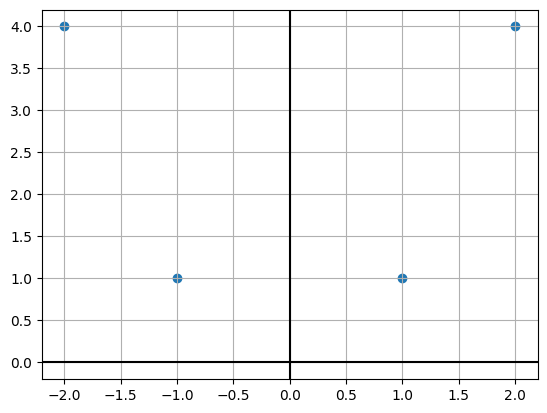

In [ ]:
plt.scatter(X[0, :], X[1, :])
plt.axhline(c='k')
plt.axvline(c='k');
plt.grid();

### Step 1: Calculate $\mathbf{K} \in \mathbb{R}^{n \times n}$ using a kernel function where $\mathbf{K}_{ij}=k(x_i,x_j)$.

In [ ]:
def pol_ker(A, B, k):
    return (A.T@B + 1) ** k

K_pol = pol_ker(X, X, 2)

In [ ]:
K_pol

array([[  9,  49,   1,   9],
       [ 49, 441,   9, 169],
       [  1,   9,   9,  49],
       [  9, 169,  49, 441]])

### Step 2: Center the kernel using the following formula.
$$
\mathbf{K}^C=\mathbf{K}-\mathbf{I}\mathbf{K}-\mathbf{K}\mathbf{I}+\mathbf{I}\mathbf{K}\mathbf{I}
$$
where $\mathbf{K}^C$ is the centered kernel, and $\mathbf{I} \in \mathbb{R}^{n \times n}$ where all the elements are $\frac{1}{n}$.

In [ ]:
def ker_cen(K):
    n = K.shape[0]
    I = np.ones((n,n)) * (1/n)
    return K - I@K - K@I + I@K@I

KC = ker_cen(K_pol)

In [ ]:
KC

array([[ 67., -43.,  59., -83.],
       [-43., 199., -83., -73.],
       [ 59., -83.,  67., -43.],
       [-83., -73., -43., 199.]])

### Step 3: Compute the eigenvectors $\{\beta _1, \beta _2, \ldots, \beta _n\}$ and eigenvalues $\{n\lambda _1, n\lambda _2, \ldots, n\lambda _n\}$ of $K^C$ and normalize to get
$$
\forall u \hspace{2em} \alpha _u = \frac{\beta _u}{\sqrt{n \lambda _u}}
$$

In [ ]:
# Enter your solution here
lam, bet = np.linalg.eigh(KC)
lam, bet = lam[::-1][:-1], bet[:,::-1][:,:-1]

In [ ]:
lam, bet

(array([277.9275172, 252.       ,   2.0724828]),
 array([[ 0.10365278, -0.5       , -0.69946844],
        [ 0.69946844,  0.5       ,  0.10365278],
        [-0.10365278, -0.5       ,  0.69946844],
        [-0.69946844,  0.5       , -0.10365278]]))

### Step 3: Compute $\sum _{j=1}^{n}\mathbf{\alpha }_{kj}\mathbf{K}_{ij}^{C} \ \ \forall k$

\begin{equation*}
\mathbf{x}_{i} \in \mathbb{R}^{d}\rightarrow \left[\begin{array}{ c c c c }
\sum\limits _{j=1}^{n}\mathbf{\alpha }_{1j}\mathbf{K}_{ij}^{C} & \sum\limits _{j=1}^{n}\mathbf{\alpha }_{2j}\mathbf{K}_{ij}^{C} & \dotsc  & \sum\limits _{j=1}^{n}\mathbf{\alpha }_{nj}\mathbf{K}_{ij}^{C}
\end{array}\right]
\end{equation*}

In [ ]:
alp = bet / np.sqrt(lam.reshape((1,-1)))

In [ ]:
alp

array([[ 0.00621749, -0.03149704, -0.48587288],
       [ 0.0419568 ,  0.03149704,  0.0720005 ],
       [-0.00621749, -0.03149704,  0.48587288],
       [-0.0419568 ,  0.03149704, -0.0720005 ]])

In [ ]:
X_prime = KC@alp

In [ ]:
X_prime

array([[  1.72801191,  -7.93725393,  -1.00696319],
       [ 11.66094908,   7.93725393,   0.14921979],
       [ -1.72801191,  -7.93725393,   1.00696319],
       [-11.66094908,   7.93725393,  -0.14921979]])

# Kernel PCA on Swiss Roll Dataset

### Step 1: Import Libraries

First, let's import the necessary libraries:

In [ ]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

### Step 2: Create the Swiss Roll Dataset

In the next cell, we'll generate the Swiss Roll dataset. This dataset is commonly used to demonstrate nonlinear dimensionality reduction techniques like Kernel PCA. We'll create a function to generate the dataset with specified parameters:

In [ ]:
def generate_swiss_roll(n_samples=1000, noise=0.2):
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = 21 * np.random.rand(1, n_samples)
    z = t * np.sin(t)
    data = np.vstack((x, y, z)).T + noise * np.random.randn(n_samples, 3)
    return data

# Generate the Swiss Roll dataset
swiss_roll = generate_swiss_roll()

### Step 3: Visualize the Original Dataset

Swiss roll dataset looks like this:

<img src="https://2.bp.blogspot.com/-ZiBR5RuYOBY/Vfnd8BMgFaI/AAAAAAAAGqk/GQdAjk5N3Gk/s1600/Blog%2B6%2BIMG_1832.jpg" width="300">

Now, let's create a 3D scatter plot to visualize the original Swiss Roll dataset:

/tmp/ipykernel_5882/3992820084.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2], c='b', cmap=plt.cm.Spectral)


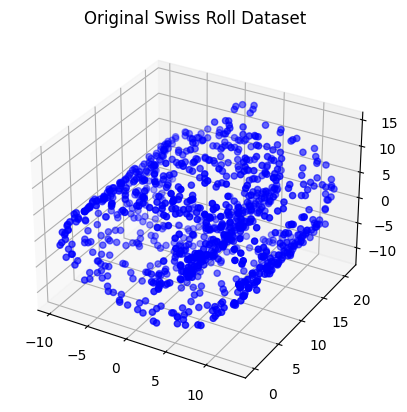

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2], c='b', cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll Dataset")
plt.show()

### Step 4: Define the Kernel Function

Kernel PCA relies on a kernel function. We'll use the Radial Basis Function (RBF) kernel, also known as the Gaussian kernel.

In [ ]:
def rbf_kernel(X, sigma=1.0):
    pairwise_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    return np.exp(-pairwise_dists / (2 * sigma**2))

### Step 5: Implement Kernel PCA
Now, let's implement Kernel PCA. We'll perform the following steps:

* Compute the kernel matrix.
* Center the kernel matrix.
* Calculate the eigenvalues and eigenvectors of the centered kernel matrix.
* Sort the eigenvectors by decreasing eigenvalues.
* Select the top $k$ scaled eigenvectors as the new feature vectors.

In [ ]:
def kernel_pca(X, n_components=2, sigma=1.0):
    # Compute the kernel matrix
    K = rbf_kernel(X, sigma)

    # Center the kernel matrix
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Calculate eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(K_centered)

    # Sort eigenvectors by decreasing eigenvalues
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Select the top n_components scaled eigenvectors
    alphas = eigvecs[:, :n_components] / np.sqrt(eigvals[:n_components])

    return alphas

# Apply Kernel PCA to the Swiss Roll dataset
n_components = 2
alphas = kernel_pca(swiss_roll, n_components, sigma=1.0)

### Step 6: Visualize the Transformed Data

Finally, let's visualize the data in the new feature space:

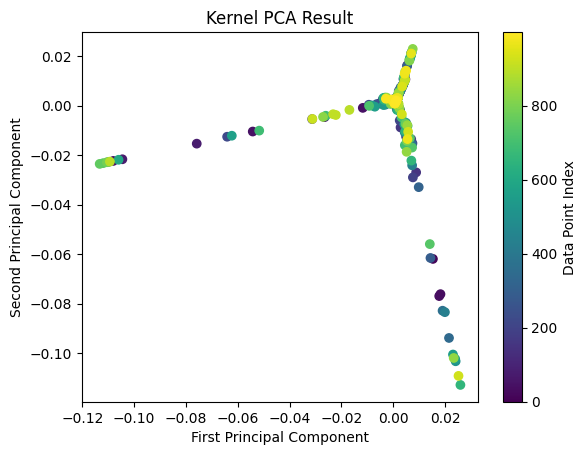

In [ ]:
# Separate the transformed data into two components
pc1 = alphas[:, 0]
pc2 = alphas[:, 1]

# Create a scatter plot with two different colors for the two PCs
plt.scatter(pc1, pc2, c=range(len(pc1)))
plt.title("Kernel PCA Result")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(label='Data Point Index')
plt.show()